In [1]:
import importlib
from main import TimeLoopExperimentController
import architectures.architecture_strategy
import architectures.architecture_constants
from architecture_results.derived_metrics_evaluator import DerivedMetricsEvaluator
import matplot_results_plotter.matplot_results_plotter
from architectures.architecture_constants import Architecture, GPUMemoryScale, RackSize, PEsConfig, base_config, resnet_18_layers

import matplotlib.pyplot as plt
from typing import Sequence, Tuple, Optional
from matplotlib.ticker import ScalarFormatter

importlib.reload(architectures.architecture_strategy)
importlib.reload(architectures.architecture_constants)
importlib.reload(matplot_results_plotter.matplot_results_plotter)

<module 'matplot_results_plotter.matplot_results_plotter' from '/home/workspace/matplot_results_plotter/matplot_results_plotter.py'>

In [2]:
base_estimator = DerivedMetricsEvaluator(Architecture.Base, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_1, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
dp_estimator = DerivedMetricsEvaluator(Architecture.Data_Parallel, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_4, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
tp_estimator = DerivedMetricsEvaluator(Architecture.Tensor_Parallel, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_4, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
# tp_estimator = DerivedMetricsEvaluator(Architecture.Tensor_Parallel, GPUMemoryScale.MEMORY_4MB, RackSize.RACK_1, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')

DerivedMetricsEvaluator created for Base, MEMORY_16MB, RACK_1, PE_4
DerivedMetricsEvaluator created for Data_Parallel, MEMORY_16MB, RACK_4, PE_4
DerivedMetricsEvaluator created for Tensor_Parallel, MEMORY_16MB, RACK_4, PE_4


In [3]:
results = base_estimator.get_onchip_results()
print(results)

{'total_cycles': 15799418880, 'total_energy': 6849659.83}


In [4]:
dp_star_results = dp_estimator.derive_total_star_results()
dp_ring_results = dp_estimator.derive_total_ring_results()
tp_star_results = tp_estimator.derive_total_star_results()
tp_ring_results = tp_estimator.derive_total_ring_results()
print("--------STAR-------------")
print("--DP--")
print(dp_star_results)

print("--TP--")
print(tp_star_results)

print("--------RING------------")
print("--DP--")
print(dp_ring_results)

print("--TP--")
print(tp_ring_results)

seeing num_gpus:  4
seeing num_gpus:  4
--------STAR-------------
--DP--
{'per_layer_network_bytes': [27885568.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50176.0], 'per_layer_onchip_bytes': [8388329472.0, 8388329472.0, 8388329472.0, 8388329472.0, 8388329472.0, 8388329472.0, 8388329472.0, 15252191072.0, 8375959552.0, 8375959552.0, 8375959552.0, 8375959552.0, 8375959552.0, 4199485440.0, 4188356608.0, 4189210624.0, 8383414272.0, 8383414272.0, 8383414272.0, 8383414272.0, 8383414272.0, 8361263104.0, 8361263104.0, 8361263104.0, 8361263104.0, 8361263104.0, 8361263104.0, 8361263104.0, 8361263104.0, 8361263104.0, 8361263104.0, 8361263104.0, 8383414272.0], 'total_network_bytes': 27935744.0, 'total_network_hops': 34922, 'total_network_latency': 2793760, 'total_network_energy': 4.470016, 'total_onchip_bytes': 270701727584.0, 'total_onchip_latency': 3949854720, 'total_onchip_energy': 2416063.46}
--TP--
{'per_layer_network_bytes': [27885568.0, 278

In [5]:

def plot_three_bar_chart(x_labels, y_values, chart_title, y_axis_title):
    """
    Draw a simple bar chart with three bars.

    Parameters
    ----------
    x_labels : list[str]
        The categorical labels shown on the x‑axis (length must be 3).
    y_values : list[float] | tuple[float]
        Heights of the three bars (same length as x_labels).
    chart_title : str
        Title displayed above the chart.
    """
    if len(x_labels) != 3 or len(y_values) != 3:
        raise ValueError("Provide exactly three x labels and three y values.")

    fig, ax = plt.subplots()

    bar_positions = range(3)    
    ax.bar(bar_positions, y_values)

    # Axis & title formatting
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(x_labels)
    ax.set_ylabel(y_axis_title)
    ax.set_title(chart_title)

    # Nice layout tweaks
    ax.margins(y=0.1)
    plt.tight_layout()
    plt.show()

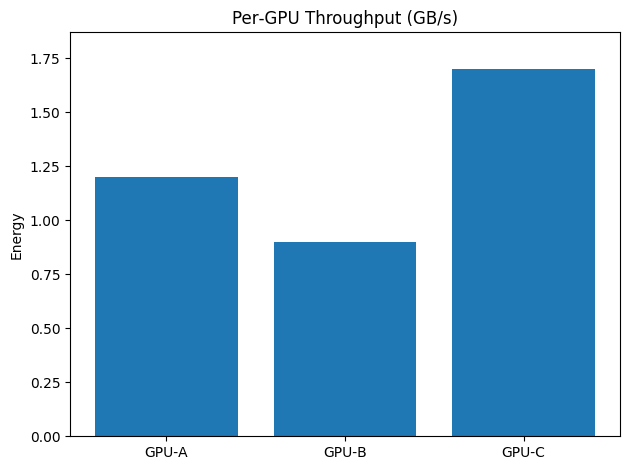

In [6]:
plot_three_bar_chart(
    ["GPU‑A", "GPU‑B", "GPU‑C"],
    [1.2, 0.9, 1.7],
    "Per‑GPU Throughput (GB/s)",
    "Energy"
)

In [7]:
def plot_grouped_bar_chart(
    x_labels: Sequence[str],
    series_1: Sequence[float],
    series_2: Sequence[float],
    series_labels: Tuple[str, str] = ("Series 1", "Series 2"),
    colors: Tuple[str, str] = ("tab:red", "tab:green"),
    chart_title: str = "",
    y_axis_title: str = "",
    use_scientific: bool = True
):
    """
    Draw a grouped‑bar chart with two bars per category.

    Parameters
    ----------
    x_labels : list[str]
        Category names shown on the x‑axis (length N).
    series_1, series_2 : list[float]
        Heights for the two series (each of length N, same order as x_labels).
    series_labels : (str, str), optional
        Legend labels for the two series.
    colors : (str, str), optional
        Matplotlib color specs for the bars.
    chart_title : str, optional
        Title displayed above the chart.
    y_axis_title : str, optional
        Label for the y‑axis.
    use_scientific : bool, optional
        • True  → show axis in scientific notation (e.g. 1 e6)  
        • False → show full integers (e.g. 1000000) with no commas
    """
    if len(series_1) != len(series_2) or len(series_1) != len(x_labels):
        raise ValueError("x_labels, series_1, and series_2 must all be the same length.")
    if len(series_1) == 0:
        raise ValueError("Provide at least one category.")

    n = len(x_labels)
    bar_width = 0.35
    x = range(n)

    fig, ax = plt.subplots()

    # Side‑by‑side bars ---------------------------------------------------------
    ax.bar([p - bar_width / 2 for p in x], series_1,
           width=bar_width, label=series_labels[0], color=colors[0])
    ax.bar([p + bar_width / 2 for p in x], series_2,
           width=bar_width, label=series_labels[1], color=colors[1])

    # Axis & title formatting ---------------------------------------------------
    ax.set_xticks(list(x))
    ax.set_xticklabels(x_labels)
    ax.set_ylabel(y_axis_title)
    ax.set_title(chart_title)
    ax.legend()

    # --- control y‑axis number formatting -------------------------------------
    if use_scientific:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))  # 1 e6
    else:
        ax.ticklabel_format(axis='y', style='plain')                  # 1000000
        fmt = ScalarFormatter(useOffset=False)
        fmt.set_scientific(False)
        ax.yaxis.set_major_formatter(fmt)

    # Layout tweaks ------------------------------------------------------------
    ax.margins(y=0.1)
    plt.tight_layout()
    plt.show()

DerivedMetricsEvaluator created for Base, MEMORY_16MB, RACK_1, PE_4
DerivedMetricsEvaluator created for Data_Parallel, MEMORY_16MB, RACK_4, PE_4
DerivedMetricsEvaluator created for Tensor_Parallel, MEMORY_16MB, RACK_4, PE_4
seeing num_gpus:  4
seeing num_gpus:  4


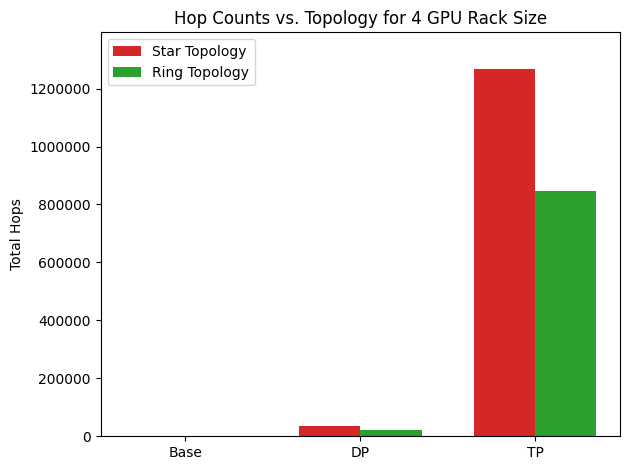

DerivedMetricsEvaluator created for Base, MEMORY_16MB, RACK_1, PE_4
DerivedMetricsEvaluator created for Data_Parallel, MEMORY_16MB, RACK_8, PE_4
DerivedMetricsEvaluator created for Tensor_Parallel, MEMORY_16MB, RACK_8, PE_4
seeing num_gpus:  8
seeing num_gpus:  8


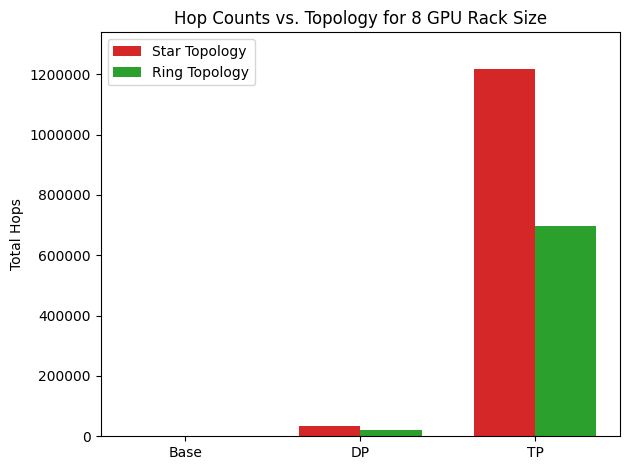

DerivedMetricsEvaluator created for Base, MEMORY_16MB, RACK_1, PE_4
DerivedMetricsEvaluator created for Tensor_Parallel, MEMORY_16MB, RACK_16, PE_4


FileNotFoundError: [Errno 2] No such file or directory: 'persisted_results/results_May 03, 2025 04:16:57 PM EST/Tensor_Parallel, MEMORY_16MB, RACK_16, PE_4/Layer Results'

In [11]:
# {
#     'per_layer_network_bytes': total_bytes['total_network_bytes'],
#     'per_layer_onchip_bytes': total_bytes['total_onchip_bytes'],
#     'total_network_bytes': sum(total_bytes['total_network_bytes']),
#     'total_network_hops': total_network_hops, 
#     'total_network_latency': total_network_hops * CYCLES_PER_HOP, 
#     'total_network_energy': total_network_hops * ENERGY_PER_HOP,
#     'total_onchip_bytes': sum(total_bytes['total_onchip_bytes']),
#     'total_onchip_latency': on_chip_results['total_cycles'], 
#     'total_onchip_energy': on_chip_results['total_energy']
# }

base_estimator = DerivedMetricsEvaluator(Architecture.Base, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_1, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
dp_estimator = DerivedMetricsEvaluator(Architecture.Data_Parallel, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_4, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
tp_estimator = DerivedMetricsEvaluator(Architecture.Tensor_Parallel, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_4, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')

dp_star_results = dp_estimator.derive_total_star_results()["total_network_hops"]
dp_ring_results = dp_estimator.derive_total_ring_results()["total_network_hops"]
tp_star_results = tp_estimator.derive_total_star_results()["total_network_hops"]
tp_ring_results = tp_estimator.derive_total_ring_results()["total_network_hops"]

plot_grouped_bar_chart(
    x_labels=["Base", "DP", "TP"],
    series_1=[0, dp_star_results, tp_star_results],
    series_2=[0, dp_ring_results, tp_ring_results],
    series_labels=("Star Topology", "Ring Topology"),
    colors=("tab:red", "tab:green"),
    chart_title="Hop Counts vs. Topology for 4 GPU Rack Size",
    y_axis_title="Total Hops",
    use_scientific=False
)


base_estimator = DerivedMetricsEvaluator(Architecture.Base, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_1, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
dp_estimator = DerivedMetricsEvaluator(Architecture.Data_Parallel, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_8, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
tp_estimator = DerivedMetricsEvaluator(Architecture.Tensor_Parallel, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_8, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')

dp_star_results = dp_estimator.derive_total_star_results()["total_network_hops"]
dp_ring_results = dp_estimator.derive_total_ring_results()["total_network_hops"]
tp_star_results = tp_estimator.derive_total_star_results()["total_network_hops"]
tp_ring_results = tp_estimator.derive_total_ring_results()["total_network_hops"]

plot_grouped_bar_chart(
    x_labels=["Base", "DP", "TP"],
    series_1=[0, dp_star_results, tp_star_results],
    series_2=[0, dp_ring_results, tp_ring_results],
    series_labels=("Star Topology", "Ring Topology"),
    colors=("tab:red", "tab:green"),
    chart_title="Hop Counts vs. Topology for 8 GPU Rack Size",
    y_axis_title="Total Hops",
    use_scientific=False
)


base_estimator = DerivedMetricsEvaluator(Architecture.Base, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_1, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
dp_estimator = DerivedMetricsEvaluator(Architecture.Data_Parallel, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_16, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')
tp_estimator = DerivedMetricsEvaluator(Architecture.Tensor_Parallel, GPUMemoryScale.MEMORY_16MB, RackSize.RACK_16, PEsConfig.PE_4,'persisted_results/results_May 03, 2025 04:16:57 PM EST')

dp_star_results = dp_estimator.derive_total_star_results()["total_network_hops"]
dp_ring_results = dp_estimator.derive_total_ring_results()["total_network_hops"]
tp_star_results = tp_estimator.derive_total_star_results()["total_network_hops"]
tp_ring_results = tp_estimator.derive_total_ring_results()["total_network_hops"]

plot_grouped_bar_chart(
    x_labels=["Base", "DP", "TP"],
    series_1=[0, 0, tp_star_results],
    series_2=[0, 0, tp_ring_results],
    series_labels=("Star Topology", "Ring Topology"),
    colors=("tab:red", "tab:green"),
    chart_title="Hop Counts vs. Topology for 8 GPU Rack Size",
    y_axis_title="Total Hops",
    use_scientific=False
)

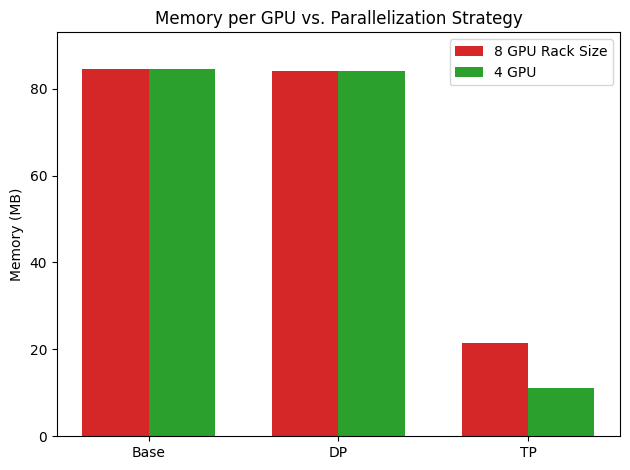

In [17]:
RESNET_SIZE_MB = 84
INPUT_SIZE_MB = 0.5

plot_grouped_bar_chart(
    x_labels=["Base", "DP", "TP"],
    series_1=[RESNET_SIZE_MB + INPUT_SIZE_MB, RESNET_SIZE_MB + INPUT_SIZE_MB / 4, RESNET_SIZE_MB / 4 + INPUT_SIZE_MB],
    series_2=[RESNET_SIZE_MB + INPUT_SIZE_MB, RESNET_SIZE_MB + INPUT_SIZE_MB / 8, RESNET_SIZE_MB / 8 + INPUT_SIZE_MB],
    series_labels=("8 GPU Rack Size", "4 GPU"),
    colors=("tab:red", "tab:green"),
    chart_title="Memory per GPU vs. Parallelization Strategy",
    y_axis_title="Memory (MB)",
    use_scientific=False
)